#Capacitação Vialab # Atividade 6
##Problema de Classificação com dataset MNIST
###Data de atualização: 27/01/2022

#Objetivo: Analisar o código e buscar aprimorar resultados do modelo de classificação


#Importando bibliotecas

In [ ]:
#Importação das bibliotecas
import tensorflow as tf #biblioteca com ferramentas para o aprendizado de máquina
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt #Biblioteca que foi utilizada para exibir imagens, gráficos e etc
import keras #Biblioteca para criação de redes neurais
from keras.datasets import mnist #Conjunto de dados que será utilizado
import pandas as pd
#Abaixo importação de ferramentas especificas do keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D #Importando tipos de camadas para rede neural
from keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical 

#Definindo e utilizando dataset

##Dataset MNIST

O dataset MNIST é um conjunto de imagens (28x28) de dígitos manuscritos, contendo digitos de 0 a 9, com 70.000 dados ao todo, sendo 60.000 no conjunto de treinamento e 10.000 no conjunto de teste, sendo uma divisão de aproximadamente 85% para o treinamento e 15% dos dados para teste.

O MNIST é amplamente utilizado para exercícios de aprendizado de máquina e está disponível na biblioteca do Keras

Além de imagens o MNIST contém números de 0 a 9, associados a imagem, informando qual dígito aquela imagem representa.

###Treino e Teste

Durante a criação de uma Rede Neural Artificial se utiliza um conjunto de dados para o seu desenvolvimento, geralmente esse conjunto é dividido em treino e teste, já que a rede neural deve primeiro aprender, no processo de treinamento, porém este aprendizado deve ser testado logo após para garantir que ela não decorou a resposta para cada tipo de situação, por isso são usados novos dados, nunca antes vistos pela rede, estes fazem parte do conjunto de teste.

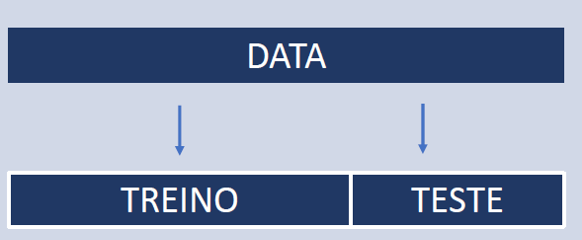

Durante o processo de treinamento parte do conjunto de treino pode ser utilizado para validação, que é para acompanhar o desempenho do modelo com dados que não haviam influenciado os ajustes da rede neural

In [ ]:
#importando dataset MNIST em X de treino/teste e y treino/teste
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

##X e Y

O que é definido como X é basicamente o conjunto de dados sem a variável de interesse, ou seja, neste caso, onde queremos classificar qual grupo cada imagem pertence nosso X seriam as imagens, é o que será passado para rede neural
já o Y é a variável de interesse do problema, neste caso o Y são os grupos que a imagem pode pertencer

In [ ]:
plt.imshow(x_train[15]) #mostrando um exemplo de imagem presente no X

In [ ]:
#Exemplo de y pertencente a imagem mostrada a cima
print('O grupo ao qual a imagem acima pertence é o seu respectivo y, ou seja:', y_train[15])

##Visualizando dados

##VISUALIANDO IMAGENS DO CONJUNTO

Abaixo algumas imagens presentes no dataset MNIST, mostradas em preto e branco, contendo representações de números de 0 a 9, ou seja, cada imagem pertence ao grupo do número que ela representa, ou seja, as imagens que tiverem o desenho do número 0 pertencem ao grupo 0, as imagens que tiverem o desenho do número 1 pertecem ao grupo 1 e assim sucessivamente

In [ ]:
##Plotando figuras do dataset em preto e branco

plt.figure(figsize=(10,10))
for i in range(9): ##laço para mostrar 9 imagens
  plt.subplot(330 + 1 + i) #usando plt, pertencente a biblioteca matplot, que foi citada nas importações, para visualizar as imagens
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

##Verificando e modificando shape dos dados

##Shape dos dados 
Os shapes dos dados são o formato em que eles se encontram, como estão organizados, no caso das imagens vamos ter 3 index de shape, por exemplo 
(N1, N2,N3)
onde N1 e N2 representam a dimensão da imagem e N3 o valor da quantidade de canais de cores, em imagens RGB serão 3 canais de cores, em imagens preto e branco, somente um, já que é usado uma escala de cinza
No caso abaixo, onde o shape será exibido o N3 seria 1, já que a imagem está em preto e branco, porém este numero fica oculto.

In [ ]:
#Verificando Shape de uma imagem
x_train[0].shape

Já o shape dos conjuntos de dados (do X de treino e de teste) contém também 3 valores, onde o primeiro valor indica a quantidade de imagens e os dois ultimos números as dimensoes das imagens

In [ ]:
#Verificando shape dos dados
print(' Shape do X de treino: ', x_train.shape, '\n','Shape do X de teste: ', x_test.shape) 
print(' Shape do Y de treino: ', y_train.shape, '\n','Shape do Y de teste: ', y_test.shape)

Foi observado que o shape dos dados dos y só tem um valor, logo será usado um "to_categorical" para separar os dados em categorias, dividi-los em grupos, já que se trata de um problema de classificação

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
#Verificando novamento o shape dos dados
print(' Shape do Y de treino: ', y_train.shape, '\n','Shape do Y de teste: ', y_test.shape)

#Rede Neural Artificial 

As redes neurais artificiais são modelos computacionais inspirados no sistema nervoso. Funcionam de forma interconectada, simulando o comportamento de redes neurais naturais para que seja possível realizar o aprendizado de máquina

##Exemplo de Rede Neural
###Abaixo podemos ver uma imagem que representa uma rede neural artificial

  --Input Layer: É a primeira camada da rede, onde o dado entrará e passará para as demais camadas

  --Hidden Layers: São as camadas intermediárias da rede onde o dado será processado e serão realizados diversos cálculos

  --Output Layer: Camada final da rede onde o dado será processado e o processo será concluído, é a camada responsável por retornar o resultado da rede

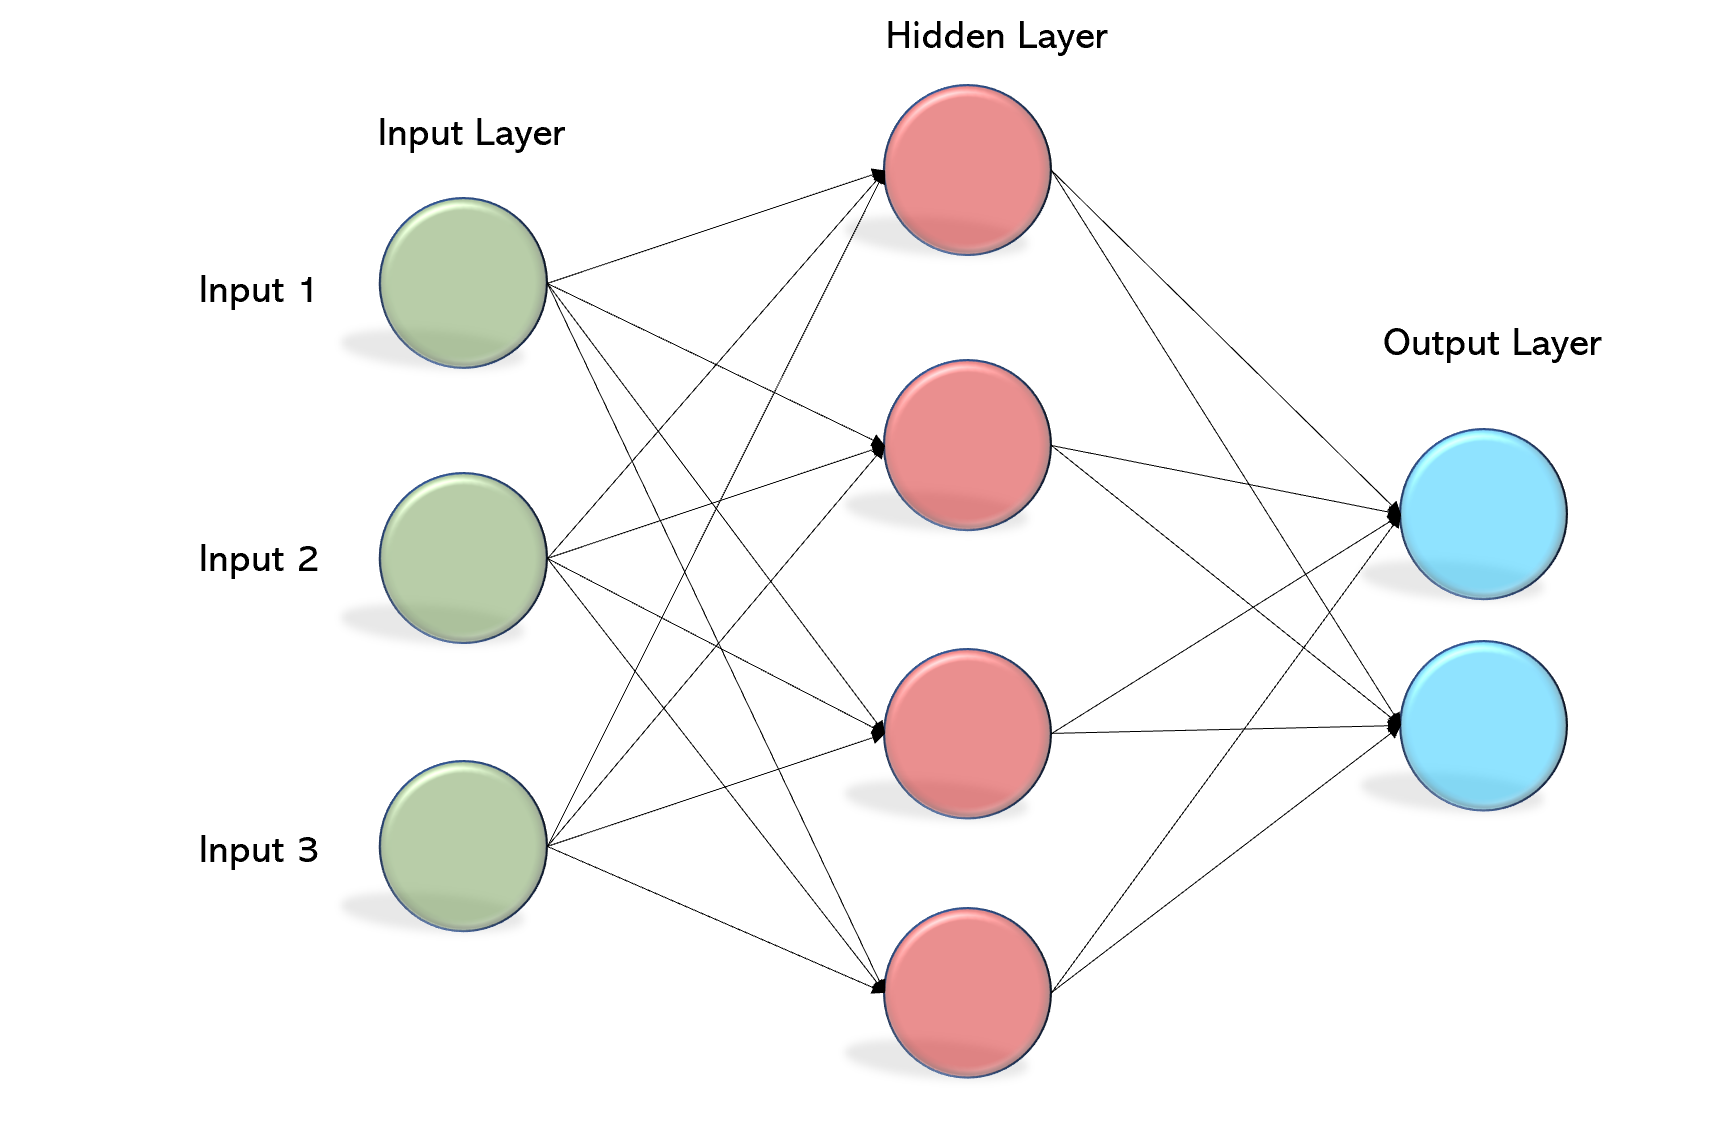

In [ ]:
#Criando a rede neural
model1 = keras.Sequential() 
model1.add(Input((28, 28))) #Adicionando camada de input
model1.add(Flatten()) #Adicionando camada Flatten, que tem como objetivo alterar a estrutura da imagem para que seja compativel com as próximas camadas
model1.add(Dense(15, activation='relu')) #Adicionando camadas densas, com funções de ativação, essas camadas realizarão cálculos e atualizações de parâmetros para buscar o resultado
model1.add(Dense(12, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(10)) #Output layer, esta é a ultima camada e é a camada de saída, contém 10 neurônios pelo fato de o resultado ser um grupo de 0 a 9, ou seja existem 10 grupos
#O número de neuronios da camada de saída, em um problema de classificação, sempre será o número de grupos existentes para aquele problema

#Compilando modelo, usando otimizador adam, funçao de loss categorical crossentropy e métrica para avaliação do modelo Accuracy
model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', #Não alterar função de loss e nem métrica de accuracy, já que isso é apenas o que irá avaliar o desempenho do modelo
              metrics=['accuracy'])

In [ ]:
#Executando treinamento do modelo, utilizando o x de treino e o y de treino
historico1 = model1.fit(x_train,
          y_train,
          epochs = 20,
          batch_size = 400,
          validation_split = 0.2) #Foi usado 20% dos dados para validação (validation_split = 0.2)

In [ ]:
#Plotando gráfico de loss referente ao treinamento da rede neural para observar o desempenho da rede durante o processo de treinamento
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.title("loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.plot(historico1.history['loss'], label="loss/Epoch")
plt.plot(historico1.history['val_loss'], label="val_loss/Epoch")
plt.legend()
plt.show()

In [ ]:
#Plotando gráfico de accuracy referente ao treinamento da rede neural para observar o desempenho da rede durante o processo de treinamento
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.title("accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.plot(historico1.history['accuracy'], label="accuracy/Epoch")
plt.plot(historico1.history['val_accuracy'], label="val_accuracy/Epoch")
plt.legend()
plt.show()

In [ ]:
#Printando o resultado de loss e de accuracy com 
test_loss, test_accuracy = model1.evaluate(x_test, y_test)
print('loss do teste:', test_loss)
print('Accuracy do teste:', test_accuracy)

##EXEMPLO DE GRÁFICO DE LOSS

Abaixo segue um exemplo de gráfico de loss indicando o comportamento de um modelo que aprendeu durante o processo de treinamento, este gráfico está apenas para exemplificar um modelo com um resultado melhor do que o apresentado anteriormente
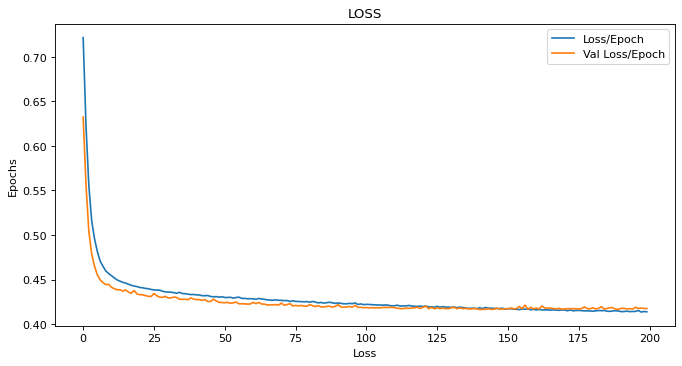